# Week 6: Homework 2 

----------------------------------------------------
Machine Learning                      

Year 2019/2020

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es* 

----------------------------------------------------

<font color='red'>
NOTEBOOK: 8,5 <br>
EXAM: 8 <br>
TOTAL: 8,25
</font> 

#1. Introduction to ensembles

The goal of ensemble learning is to combine a set of base learners to build an improved prediction model. The key idea  behind ensembles lies in exploiting the diversity among the base learners; the way of generating this diversity let us classify these methods into two main types:

* **Bagging**: the diversity  among classifiers is generated using different partitions of the training data.
* **Boosting**: it sequentially train a set of weak classifiers using modified versions of the data.

We have already seen a kind of these methods: *Random Forests (RF)*. Remember that RF train a set of trees, each tree use a different subset of samples and features, and later combine their outputs. So, we can say that RF is a Bagging method. 


# 2. Bagging: Boostrap Aggregating

A bagging ensemble combines a set of classiffiers where each base learner is trained with a bagged subset of the training samples. This bagging subsampling consist in randomly, and with replacement,  choosing multiple random samples from the original training data. 

Once the set of base learners is trained, the final ensemble output is obtained by averaging all learner's outputs. In the classification case, usually a majority vote is applied.

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Ensembles/Bagging.png" width="48%" > 


(*) Figure from https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de


**References**

L. Breiman, “Bagging predictors”, Machine Learning, 24(2), 123-140, 1996.




# 3. Boosting: Real Adaboost

Boosting methods train a sequence of weak classifiers with weighted or emphasized versions of the training data. Each one of these classifiers is weak since its error rate can be only slightly better than random guessing. Finally, to obtain the final ensemble output, the predictions from all of them are then combined through a weighted combination of all learners' outputs.


The most popular boosting algorithm is called **AdaBoost** (Adaptive Boosting). This boosting method trains this sequence of weak classifiers in such way that each new classifier pay more attention to samples missclassified by the previous learners. Versions of this algorithm are:
* AdaBoost.M1 or  “Discrete AdaBoost” where base learners outputs are discrete estimations of the output class.
* “Real AdaBoost”, in this case, base classifier return a real-valued prediction (e.g., a probability mapped to the interval [−1,1]).

Let's now go deeper in the working principles of the **Real AdaBoost** algorithm.

**References**

* Schapire, R.E. The strength of weak learnability. Machine Learning, 5(2): 1651-1686, 1990.

* Freund, Y. and Schapire, R.E. Experiments with a new boosting algorithm. Proc. of the 13th International Conference on Machine Learning. pp. 148-156, 1996.


## Real Adaboost
Consider we have a binary classification problem given by training dataset $S$ consisting  of $N$ pairs $(\mathbf{x}^{(i)},y^{(i)})$, where $\mathbf{x}^{(i)}\in\mathbb{R}^L$ is the $i$-th observation and $y^{(i)}\in\{-1,1\}$  is its associated label.

Real Adaboost (RA) sequentially trains a set of $T$ learners where each learner implements a prediction function $o_t(x) \in [-1,1]$. To learn this prediction function each learner observes the overall training dataset $S$, but an emphasis function $D_t(\mathbf{x})$ is used during its training to make the learner pay more attention to most erroneous samples.
Finally, the ensemble output is obtained as an averaged weighted sum of all learner output:

$$ f_T({\bf x}) = \displaystyle \sum_{t=1}^T \alpha_t o_t({\bf x})$$

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Ensembles/boosting.jpg" width="30%" > 



* **Emphasis function**:
To force diversity among the base learners, by means of an emphasis function RA applies weights  to each of the training observations. Initially all weights are equal:
$$ D_{1}({\bf x}^{(i)}) = \frac{1}{N}   $$

  so that the first learner is trained in the usual manner. For next iterations,  $t = 2,3,\ldots,T$, the emphasis function updated with the following rule:

$$ D_{t+1}({\bf x}^{(i)}) = \frac{D_{t}({\bf x}^{(i)}) \exp \left( - \alpha_t o_t({\bf x}^{(i)}) {y}^{(i)} \right)}{Z_t}   $$

  where $Z_t$ is a normalization constant making $\sum_{i=1}^N D_{t+1}({\bf x}^{(i)})  = 1$. Note that this update rule increase the emphasis weight for those observations that were misclassified by the previous classifiers, whereas the weights are decreased for those that were  correctly classified. Thus, as new learners are added to the ensemble, most erroneous samples will receive an increased attention.

* **Output weights ($\alpha_t$)**

To obtain the output weights, RA minimizes the exponential loss function:
$${\bf \alpha}^* =\displaystyle \underset{{\bf \alpha}}{\operatorname{min}} \sum_{i=1}^N \exp \left( - \sum_{t=1}^T \alpha_t o_t({\bf x}^{(i)}) {y}^{(i)} \right) = \displaystyle \underset{{\bf \alpha}}{\operatorname{min}} \sum_{i=1}^N \exp \left( - f_T({\bf x}^{(i)}) {y}^{(i)} \right)$$

which solution can be analytically computed as

$$\alpha_t = \frac{1}{2} \ln \left( \frac{1+\gamma_t}{1-\gamma_t}\right)$$

where $\gamma_t = \sum_{i=1}^N   D_{t}({\bf x}^{(i)}) o_t({\bf x}^{(i)}) {y}^{(i)} $. The effect of these weights is to give higher influence to the more accurate classifiers in the ensemble. 


**Exponential loss**

This cost function, quite similar to the binomial deviance, is un upper bound of the classification error.


In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

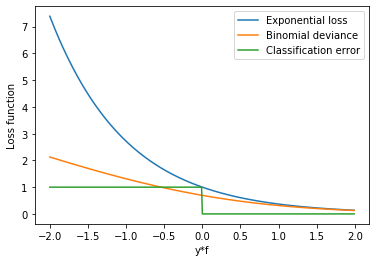

In [2]:
# Plot the exponential loss function (un upper bound of the classfication error)
f = np.arange(-2,2,0.01)
y = 1

l_alpha = np.exp(-y*f)
plt.figure()
plt.plot(y*f,l_alpha, label='Exponential loss')


# Compare with binomial deviance
l_w = np.log(1+ np.exp(f))-y*f
plt.plot(y*f,l_w, label='Binomial deviance')

# Classification error
e_class = np.zeros(f.shape)
e_class[y*f<0] =1
plt.plot(y*f,e_class, label='Classification error')

plt.legend()
plt.xlabel('y*f')
plt.ylabel('Loss function')

plt.show()

# 4. Let's work

The aim of this second HW is to implement and analyse the performance of these enseble methods. To do this, we will work with the Breast Cancer database (described in the next section) and you will have to complete the following exercises.

### Exercise 1. Load and prepare the data

For this lab session, let's work over the  [Breast cancer data set](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) a binary classification problem aimed to detect breast cancer from a  digitized image of breast mass. For this prupose, the images have been preprocesed and characterized with 30 input features describing the mass.

Complete next cell code, so that you can:
* Load the dataset
* Create training and testing partitions with the 60% and 40% of the original data
* Normalize the data to zero mean and unitary standard deviation 

In [0]:
# <SOL>
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data = load_breast_cancer()

X = data.data
Y = data.target
feature_names = data.feature_names


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)


# Data normalization: normalizamos tanto train como test para poder trabajar con ellos.
transformer = StandardScaler().fit(X_train)  
X_train_norm = transformer.transform(X_train) 
X_test_norm =  transformer.transform(X_test)

# </SOL>

### Exercise 2. Bagging methods


### Exercise 2.1
Complete the following code to desing a function able to train and test a bagged ensemble of $T$ decision trees where each tree have to use a subset of *nperc* of the total number of training samples. Adjust the decision tree parameters so that the maximum depth is fixed to 2 (weak learner).


In [0]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from scipy import stats
import pandas as pd


def BaggEnsemble_man(X_train, Y_train, X_test, Y_test, T, nperc):
  '''
  Train and evaluate a bagged ensemble of decission trees

    Args:
        X_train(numpy dnarray): training (number training data x number dimensions). 
        Y_train (numpy dnarray): labels of the training data (number training data x 1).
        X_test(numpy dnarray): test data to evaluate the ensemble performance (number test data x number dimensions).
        Y_test (numpy dnarray): labels of the test data (number test data x 1).
        T: number of learners in the ensemble  
        nperc: subsampling rate for the bagging process. Value from 0 (none sample is used) to 1 (all samples are used)                                       
   Returns:
        acc_tree_train (numpy dnarray): accuracy over the training data for different number of learners. 
                It's a vector length T, where the t-th element is the ensemble accuracy when only t trees are used.
        acc_tree_test (numpy dnarray): accuracy over the test data for different number of learners. 
                It's a vector length T, where the t-th element is the ensemble accuracy when only t trees are used.
        Y_pred_train (numpy dnarray): predicted outputs over the training data. It's a matrix of dimensions T x number of training samples, 
          where the t-th row has the predicted outputs when t trees are used.
        Y_pred_test (numpy dnarray): predicted outputs over the test data. It's a matrix of dimensions T x number of test samples, 
          where the t-th row has the predicted outputs when t trees are used.

  '''
  # <SOL>

  clf = DecisionTreeClassifier(max_depth = 2)
  acc_tree_test = []
  acc_tree_train = []
  Y_pred_train = np.zeros([T, X_train.shape[0]])
  Y_pred_test = np.zeros([T, X_test.shape[0]])
  soft_train = np.zeros([ X_train.shape[0], T])
  soft_test = np.zeros([ X_test.shape[0], T])
  ind_train = np.arange(0, X_train.shape[0])

  temp_mat_train = np.zeros([T, X_train.shape[0]])
  temp_mat_test = np.zeros([T, X_test.shape[0]])


  for t in range(T):
    
    index = np.random.choice(ind_train, size=int(X_train.shape[0]*nperc))

    clf = DecisionTreeClassifier(max_depth=2)
    clf.fit(X_train[index, :], Y_train[index])

    temp_mat_train[t, :]= clf.predict(X_train)[:, np.newaxis].transpose()
    temp_mat_test[t, :]= clf.predict(X_test)[:, np.newaxis].transpose()

    soft_train[:, t]= clf.predict_proba(X_train).transpose()[1,:]
    soft_test[:, t]= clf.predict_proba(X_test).transpose()[1,:]

    Y_pred_train[t, :]= stats.mode(temp_mat_train[0:(t+1), :], axis= 0)[0]
    Y_pred_test[t, :]= stats.mode(temp_mat_test[0:(t+1), :], axis= 0)[0]

    acc_tree_train.append(accuracy_score(Y_train, Y_pred_train[t, :]))
    acc_tree_test.append(accuracy_score(Y_test, Y_pred_test[t, :]))
  
  # </SOL>
  return acc_tree_train, acc_tree_test, Y_pred_train, Y_pred_test, soft_train, soft_test

### Exercise 2.2

Train an ensemble of 40 trees with a subsamplig rate of 50% (T=40 and nperc = 0.5).

Accuracy on train:  [0.9384164222873901, 0.9237536656891495, 0.9560117302052786, 0.9589442815249267, 0.9560117302052786, 0.9501466275659824, 0.9618768328445748, 0.9530791788856305, 0.9530791788856305, 0.9501466275659824, 0.9530791788856305, 0.9530791788856305, 0.9560117302052786, 0.9530791788856305, 0.9618768328445748, 0.9589442815249267, 0.9648093841642229, 0.9648093841642229, 0.9648093841642229, 0.9648093841642229, 0.9648093841642229, 0.9648093841642229, 0.9618768328445748, 0.9648093841642229, 0.9618768328445748, 0.9648093841642229, 0.9648093841642229, 0.9648093841642229, 0.9648093841642229, 0.9648093841642229, 0.9618768328445748, 0.9618768328445748, 0.9589442815249267, 0.9618768328445748, 0.9618768328445748, 0.9618768328445748, 0.9618768328445748, 0.9648093841642229, 0.9648093841642229, 0.9618768328445748, 0.9648093841642229, 0.9618768328445748, 0.9618768328445748, 0.9618768328445748, 0.9618768328445748, 0.9618768328445748, 0.9618768328445748, 0.9618768328445748, 0.9648093841642229,

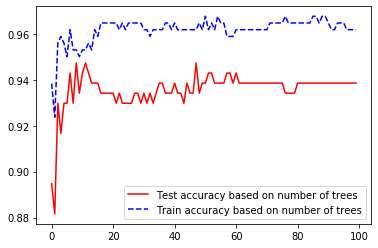

In [9]:
# <SOL>
acc_tree_train, acc_tree_test, Y_pred_train, Y_pred_test, soft_train, soft_test = BaggEnsemble_man(X_train, Y_train, X_test, Y_test, T=100, nperc=0.5)

print("Accuracy on train: ", acc_tree_train)

print("Accuracy on test: ", acc_tree_test)

print("Best acc on test: ", acc_tree_test[np.argsort(acc_tree_test)[-1]])
print("Using that number of trees: ", np.argsort(acc_tree_test)[-1])
plt.figure()
plt.plot(acc_tree_test, 'r', label="Test accuracy based on number of trees")
plt.plot(acc_tree_train, 'b--', label="Train accuracy based on number of trees")
plt.legend()
plt.show()

# </SOL>

# If we take a look to our figures, using bagging we are using randomly bags of subsampling. This givs us a really nice test accuracy that increase our goal to correct predict instead of using only one tree. Here we are using 100 trees with randomly subsampling of features. As can be shown, when we increase the trees we got better results because we are training with so different subsamples of our dataset. But it has a limit. As can be shown, when we try to use more than 60 learners our results remain mainly hte same on train an test accuracy. That is because we don't have infinite data to train and when we use a huge number of learners, using more subsamplings may can repeat the subsample used on the train before so we are not improving anything. 
<span style="color:red"> This is just the same that saying that we don't get additional diversity among the tress!!!!</span>
We are only wasting computing force because it is mainly reproducying trainers that we really archieved on before learners. In fact, we can say that with 40 learners we got almost the same result.





### Exercise 2.3

Analyze the **diversity** among the base learner' outputs for different *nperc* rates. You can analyze this diversity by measuring the correlation among the learner's soft-outputs. Firstly, obtain the matrix with all pairwaise correlation values (over the training learners' outputs) and, then, compute the ensemble diversity as one minus the averaged value of all pairwise correlation values. Finally, analyze the results.

Some useful functions: [np.corrcoef](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html)

Note: You can find other ensemble diversity measurements in https://lucykuncheva.co.uk/papers/lkml.pdf

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


[nan, 0.8602603903831133, 0.8729248048914482, 0.7929230264657033, 0.7250148731183053, 0.8049649504804377, 0.8110621690280334, 0.7633947037698223, 0.698003640113869]


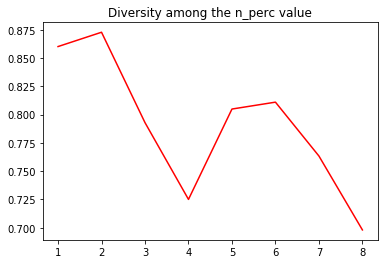

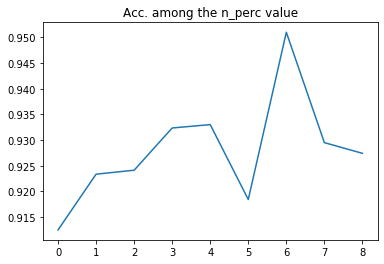

In [6]:
# <SOL>
T=40
nperc=np.arange(0.1,1,0.1)
diver=[]
acc=[]
triangle = []

for elements in nperc:
  acc_tree_train, acc_tree_test, Y_pred_train, Y_pred_test, soft_train, soft_test = BaggEnsemble_man(X_train, Y_train, X_test, Y_test, T, nperc=elements)
  
  correlation=np.corrcoef(soft_train)
  triangle=correlation[np.triu_indices(T,k=1)]
  #for i in range(correlation.shape[0]):
   # for j in range(correlation.shape[1]):
    #  if (j>i):
     #    triangle.append(correlation[i, j])
  
  diversity=1-np.mean(triangle)
  diver.append(diversity)
  acc.append(np.mean(acc_tree_test))
  
plt.figure()
print(diver)
plt.plot(diver, 'r')

plt.title("Diversity among the n_perc value")
plt.figure()
plt.plot(acc)
plt.title("Acc. among the n_perc value")
plt.show()
# </SOL>


# **As you increase the n_perc value we decrease our diversity. That is because n_perc says us the size of the subset. If we do subset of almost our data set(as using 80%) we, obviously, reduce the diversity because it is more likely to be the same subset for each tree. Meanwhile, if you use low n_perc value, your sizes will be so small so the probability to repeat the same tree with the same subset decreases, so each learner tend to be more different that the last.**

# By the other way, the accuracy doesnt appears to be realted to the diversity. AS can be shown on the figure, it seems to increase with the n_perc size value, but if we take a look to the scale it only increases less than 0.06 points.
<span style="color:red">This a 6%, I think that it's significant!!!</span>
If we suppose that these increase is important to take into account, we can say that the accuracy increases because if we use more dataset to train we can be more likely to better generalize that using a small dataset.


<span style="color:red">Interesting the analysis diversity and accuracy with n_perc, but which final conclusion do you get? Do you prefer high or low diversities?</span>

### Exercise 2.4

Compare the performace of the bagged ensemble trained in Exercise 2.1 with that of a Random Forest with the same number of learners, and using trees with a maximum depth of 2. Which differences are between both methods? 

Analyze the feature importances provided by the method RandomForestClassifier().


In [0]:
# <SOL>
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, Y_train)
acc_rf_test = accuracy_score(Y_test, clf.predict(X_test))

print("Accuracy Bagging method over test: ", acc_tree_test[np.argsort(acc_tree_test)[-1]])

print("Accuracy RF over test  ", acc_rf_test)


Accuracy Bagging method over test:  0.9429824561403509
Accuracy RF over test   0.9429824561403509


# **As can be shown, the result is almost the same. That is because RandomForest does almost the same that our method because is also an ensembles method based on trees. RandomForest create a n_estimators number of trees with random subsamples (as our method) and ALSO chooses a random subsample of features. Then it does a vote to get the correct prediction between all the trainers with different subsets of sambles and subset of features. The MAINLY difference between random forest and our method is that random forest also chooses random subset of features for each tree. So it provides a feature selection because the features that gave us the best result can be used as the best features to explain our dataset.**

<span style="color:red">Good conclusions, but if you compare the accuracy evolution or the diversity you can get more differences!!!</span>

Features (numerically) in order of relevancy (most relevant to less relevant)
[22  7  6 27 20  2 13 23  3 26  0 10 12 25 29 24 17  1 15  5 28  4 19  8
 11 18 16  9 14 21]
Features (by name) in order of relevancy (most relevant to less relevant)
['worst perimeter', 'mean concave points', 'mean concavity', 'worst concave points', 'worst radius', 'mean perimeter', 'area error', 'worst area', 'mean area', 'worst concavity', 'mean radius', 'radius error', 'perimeter error', 'worst compactness', 'worst fractal dimension', 'worst smoothness', 'concave points error', 'mean texture', 'compactness error', 'mean compactness', 'worst symmetry', 'mean smoothness', 'fractal dimension error', 'mean symmetry', 'texture error', 'symmetry error', 'concavity error', 'mean fractal dimension', 'smoothness error', 'worst texture']


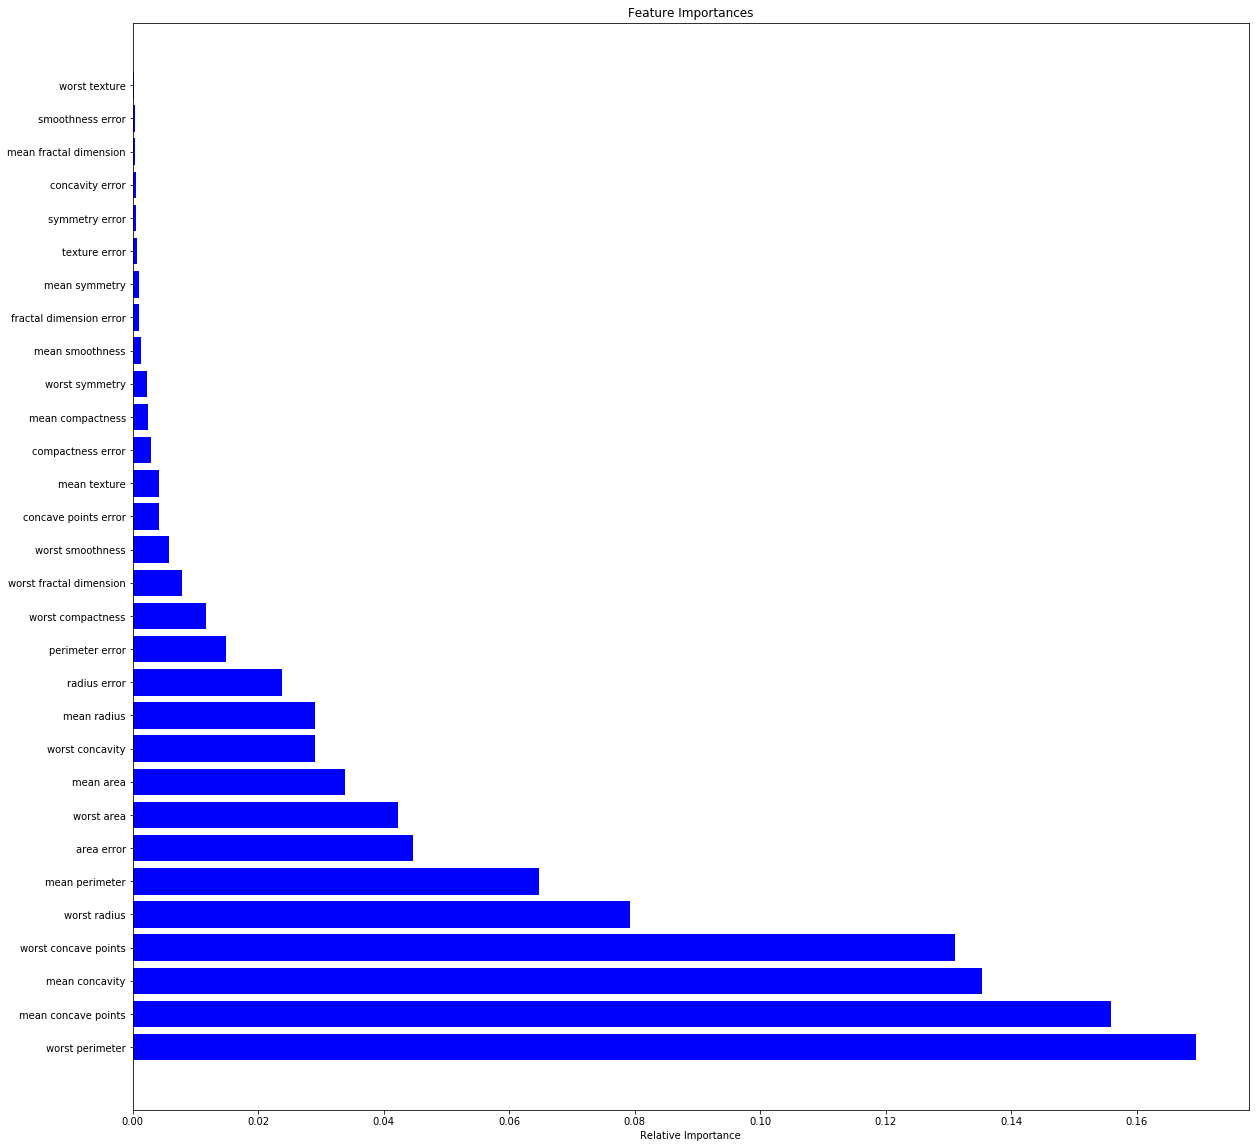

In [0]:
# <SOL>
print("Features (numerically) in order of relevancy (most relevant to less relevant)")
print(np.argsort(-clf.feature_importances_))
names = []
print("Features (by name) in order of relevancy (most relevant to less relevant)")
for elements in np.argsort(-clf.feature_importances_):
  names.append(feature_names[elements])
print(names)

plt.figure(figsize=(20, 20))
plt.title('Feature Importances')
plt.barh(range(len(names)), clf.feature_importances_[np.argsort(-clf.feature_importances_)], color='b', align='center')
plt.yticks(range(len(names)), names)
plt.xlabel('Relative Importance')
plt.show()
# </SOL>

# **As we have explained on the before comment, the randomforest provides us a feature importances selection given by the random trees created during the training procedure. The features that have provided us better classify across all the trees accuracy are chosen as the most relevant features. Remember that random forest choses randomly a subset of features different for each trainer. In our case of study, we have plotted them in order of relevancy, being the three bests features that explains our data: mean perimiter, area error and worst area.**


<font color='red'>I like your plot, but the features that you point out as the most relevant are different from the most relevant of the plot</font> 


### Exercise 3.Boosting methods

### Exercise 3.1

Complete the following cell code to desing a funtion able to train a boosting ensemble of $T$ decision trees. Again, fix the maximum depth of the tree to 2.



In [0]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
from scipy import stats
import pandas as pd


def RAEnsemble(X_train, Y_train, X_test, Y_test, T):
  '''
  Train and evaluate a bagged ensemble of decission trees

    Args:
        X_train(numpy dnarray): training (number training data x number dimensions). 
        Y_train (numpy dnarray): labels of the training data (number training data x 1).
        X_test(numpy dnarray): test data to evaluate the ensemble performance (number test data x number dimensions).
        Y_test (numpy dnarray): labels of the test data (number test data x 1).
        T: number of learners in the ensemble                                        
   Returns:
        acc_tree_train (numpy dnarray): accuracy over the training data for different number of learners. 
                It's a vector length T, where the t-th element is the ensemble accuracy when only t trees are used.
        acc_tree_test (numpy dnarray): accuracy over the test data for different number of learners. 
                It's a vector length T, where the t-th element is the ensemble accuracy when only t trees are used.
        Y_pred_train (numpy dnarray): predicted outputs over the training data. It's a matrix of dimensions T x number of training samples, 
          where the t-th row has the predicted outputs when t trees are used.
        Y_pred_test (numpy dnarray): predicted outputs over the test data. It's a matrix of dimensions T x number of test samples, 
          where the t-th row has the predicted outputs when t trees are used.
        alpha (numpy dnarray): weight vector of length T with the ouput weights assigned to combine the learner's outputs.
        Dt_all (numpy dnarray): emphasis function used to train each learner. It's a matrix of dimensions T x number of training samples, 
          where the t-th row has the emphasis function used by the t-th learner.

  '''
  #Create structures of matrices
  acc_tree_train = np.zeros(T)
  acc_tree_test = np.zeros(T)
  Y_pred_train = np.zeros([T, X_train.shape[0]])
  Y_pred_test = np.zeros([T, X_test.shape[0]])
  Dt_all = np.zeros([T, X_train.shape[0]])
  alpha = np.zeros(T)

  #initialyze first value of dt
  Dt = np.ones(X_train.shape[0]) / X.shape[0]

  for t in np.arange(T):

    #create the clf
    clf = DecisionTreeClassifier(max_depth=2)
    #fit it to x and y train with the weights
    clf.fit(X_train, Y_train, Dt)

    #create the naive predictions
    Y_pred_train[t,:] = clf.predict(X_train)
    Y_pred_test[t,:] = clf.predict(X_test)
    Y_soft_train = clf.predict_proba(X_train)[:,1]

    #use that naive predictions to calculate parameters: alpha, gamma and Dt
    gamma = np.sum(Dt * Y_pred_train[t,:]* Y_train)
    alpha[t] = 0.5 * (np.log( (1+gamma)/(1-gamma) ))
    Dt *= np.exp(-alpha[t] * Y_pred_train[t,:] * Y_train)
    Dt /= np.sum(Dt)
    Dt_all[t, :] = Dt

    #Lets calculate the result of this learner using the Adaboost formula
    final_train = np.zeros(X_train.shape[0])
    final_test = np.zeros(X_test.shape[0])
    for i in np.arange(t+1):
      final_train += Y_pred_train[i,:] * alpha[t]
      final_test += Y_pred_test[i,:] * alpha[t]

    #Store accuracys
    acc_tree_train[t] = accuracy_score(np.sign(final_train), Y_train)
    acc_tree_test[t] = accuracy_score(np.sign(final_test), Y_test)

  return Y_pred_train, Y_pred_test, acc_tree_train, acc_tree_test,  alpha, Dt_all

 # <SOL>


### Exercise 3.2

Train a Real Adaboost ensemble of 40 trees and analyze the accuracy results over train and test data. Discuss the results. 

Remember that RA learners' output have to provide outputs between $[-1,1]$, so convert the data labels to values $-1$ and $1$ to make this work.

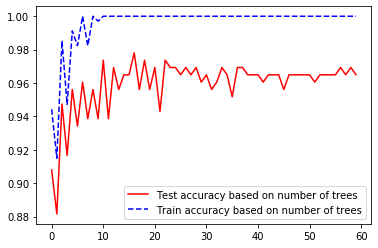

In [0]:
 # <SOL>
Y_train_converted = np.copy(Y_train)
Y_train_converted[Y_train_converted == 0] = -1

Y_test_converted = np.copy(Y_test)
Y_test_converted[Y_test_converted == 0] = -1


Y_pred_train, Y_pred_test, acc_tree_train, acc_tree_test,  alpha, Dt = RAEnsemble(X_train, Y_train_converted, X_test, Y_test_converted, T=60)
plt.figure()
plt.plot(acc_tree_test, 'r', label="Test accuracy based on number of trees")
plt.plot(acc_tree_train, 'b--', label="Train accuracy based on number of trees")
plt.legend()
plt.show()

 # </SOL>

# **Using RA we can see that we reach the best performance earlier that before. Now, close to the 10 trees we can say that the train accuracy has reached it best. Meanwhile, on test accuracy, once we archieve the 10 trees it starts to oscilate between an average fo 96. That is because adaboost, instead of bagging, reuses the data missclassified emphasying it to create a more comple model that can explain this data. This increases the accuracy in a huge way compared to bagging. But this method, when you add so much learners (as we can see reaching at 60 learners) tends to overfit creating a model so complex that explain our train data perfectly (as can be shown on training accuracy that reaching nearly 100%). In conclusion, adaboost reaches earlier a good accuracy by using missclassified data on the next bags for the next trainers but it tends to overfit, so we have to be aware of using so much learners.


<font color='red'>Great conclusions. There is inly something missing: when the train is 100%, adding new learners can improve the test performance</font> 

### Exercise 3.3. 
Finally,  plot the evolution of the emphasis function and the alpha values. Analyze the results.

(60, 341)


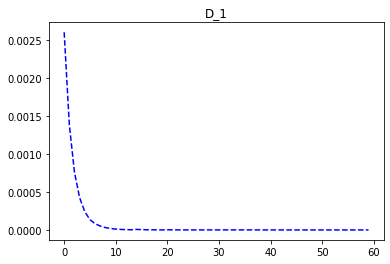

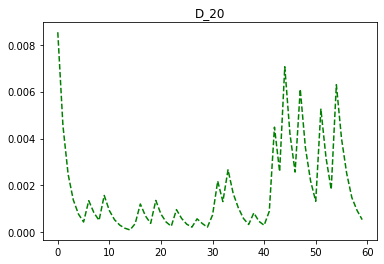

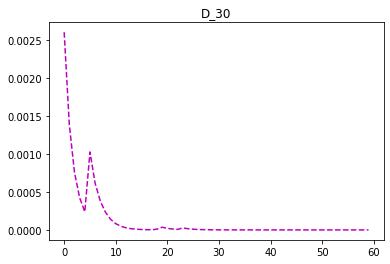

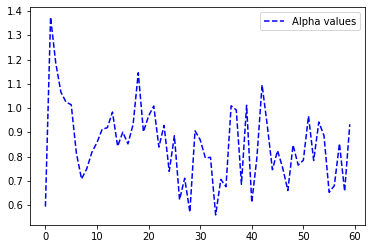

In [0]:
 # <SOL>
print (Dt.shape)
plt.figure()
plt.title("D_1")
plt.plot(Dt[:, 1], 'b--', label="Emphasis function with T=1")
plt.show()
plt.figure()
plt.title("D_20")
plt.plot(Dt[:, 20], 'g--', label="Emphasis function with T=20")
plt.show()
plt.figure()
plt.title("D_30")
plt.plot(Dt[:, 30], 'm--', label="Emphasis function with T=40")
plt.show()

plt.figure()
plt.plot(alpha, 'b--', label="Alpha values")
plt.legend()
plt.show()
 # </SOL>

# The emphasis functions gives us information about the data that is missclassified by a learner. Adaboost takes into account this emphasis function to know which data is missclasified and add this data to the next bag to train the next model. In that way, our model retrain the data missclassified to create a robust model to that data. So, as we can see on the figures, when some data is missclasified (as data nº 30 on the figure D_30) the model increased its emphasies on the first learners to classify it correctly. Then, when it has been correct classified, it remains close to 0 because we actually know how to classify this data, now we have not to emphasies on it anymore. In other hand, we have D_20, that is a data so missclasified for almost every learner, so the model maitened its emphasis function with a high value to try to fit this kind of data.


# **Alpha initialyzes on a high value at the begining because it gives high influence to the first trees that give us the best accuracy. At the begining, that value is very high because we increase extremly the performance on the first steps of our algorithm. Then, it start oscilaning in values between 0.6 and 1.1.**


<font color='red'>Great conclusions. </font> 

# 5. Bias and variance trade-off

Consider that the real clf behind our dasaset is given by:

$$Y = f(X) + \epsilon$$

so an observation $x$ is generated from the r.v.  $X$ and, then, it is transformed by a function $f(\cdot)$ and contaminated by an additive gaussian noise $\epsilon$ of zero mean and variance $\sigma_{\epsilon}^2$, to finally generate the target or label value $y$.

When a classifier or estimator is designed from a set of observations and labels, we design a function $\hat{f}(\cdot)$ trying to approximate as well as possible the original funtion $f(\cdot)$. In this case, **the expected squared prediction error** is:

$$ \mathbb{E} \left[ \left(Y−\hat{f}(X)\right)^2\right] = \mathbb{E} \left[ \left({f}(X) + \epsilon −\hat{f}(X)\right)^2\right] =  \left(\mathbb{E} \left[ {f}(X) \right]−\mathbb{E} \left[\hat{f}(X)\right]\right)^2 + \mathbb{E} \left[ \left(\hat{f}(X) − \mathbb{E}\left[ \hat{f}(X)\right]\right)^2\right] +  \sigma_{\epsilon}^2$$

Thus, this error can be decomposed into:
* A squared **bias** term ($\left(\mathbb{E} \left[ {f}(X) \right]−\mathbb{E} \left[\hat{f}(X)\right]\right)^2$): This terms represents the expected  difference between the prediction of the designed model and the value given by the real model. 
* A **variance** term ($\mathbb{E} \left[ \left(\hat{f}(X) − \mathbb{E}\left[ \hat{f}(X)\right]\right)^2\right]$): This term measures the variability of a model prediction.
* The **noise** term. This is the noise term presenting in the generation data model.

Usually, we have a single dataset and we train a unique model, so talking about expected or average prediction values might sounds quite strange. However, to undertand what these expectations are representing, consider that we can generate different training data sets from the distribution of $X$ and, for each data set, we can create a new model. Due to randomness in the underlying data sets, the resulting models will have a range of predictions. So, the bias term measures how far these models' predictions are from the correct value; whereas, the variance measures these predictions (for a given sample) vary between different realizations of the model.



<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Ensembles/Bias_Var.png" width="40%" > 



These  error terms are related to complexity of the model and to the concepts of under-fitting and over-fitting that we reviewed in the previous notebooks:
* Imagine that we have a **complex model**, able to be adjusted to the training data. In this case, different runs of the training data will generate quite different models, presenting a high variability or **high-variance** among them. These models usually present a high risk of **overfitting** and a bad generalizaztion capability.
* Now consider a **simpler model**, that don't tend to overfit, but may **underfit** their training data since it is not able to capture data distribution. Different realizations of this model will present similar predictions, but all of them will be far from the real value to be predicted, presenting a **high bias**.

In an ideal scenario, we would have infinite data to learn our model and we should be able to reduce both the bias and variance terms to 0. However, in a real world, there is a tradeoff between minimizing the bias and minimizing the variance and we can control this with the model complexity. As we increase the model complexity (more parameters are added), we can get to reduce the bias, but the variance is increased.


<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/Ensembles/Bias_Var_ModelComplexity.png" width="40%" > 





Check the next cell code where the bias and variance term are computed for a decission tree classifier.

Note that, in this example, we are modeling a noise free problem ($\sigma_{\epsilon}^2=0$). That is, we are considering $Y = f(X)$.


(569,)
(569,)
(569,)
(569,)
(569,)
(569,)
(569,)
(569,)
The squared Bias term is:  [0.02719807 0.02063866 0.01631301 0.01408418 0.01255378 0.01300931
 0.01333357 0.01191511]
The Variance term is:  [0.03348735 0.03384288 0.03400334 0.0368297  0.03554815 0.03597135
 0.03678946 0.03565958]
The MSE is:  [0.06068541 0.05448155 0.05031634 0.05091388 0.04810193 0.04898067
 0.05012302 0.04757469]
We can check that MSE = Bias^2 + Variance


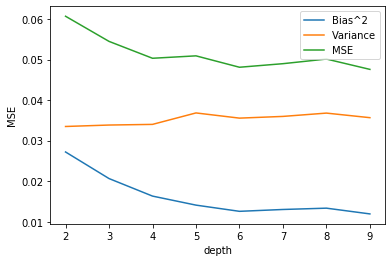

In [0]:
nperc=0.4
niter=100

# Use all data together (we don not nedd test data anymore)
X = np.vstack((X_train,X_test))
Y = np.hstack((Y_train,Y_test))

N = X.shape[0]
Nsub = np.int(nperc*N)

all_f_pred = np.zeros((niter,N))

rang_depth =  np.arange(2,10)

Bias2 = np.zeros((rang_depth.shape[0],N))
Var = np.zeros((rang_depth.shape[0],N))
MSE = np.zeros((rang_depth.shape[0],N))

for d, depth in enumerate(rang_depth):

  clf_tree = tree.DecisionTreeClassifier(max_depth=depth) 
  for i in range(niter):
    # Select some random samples
    samplesid = np.random.choice(N, Nsub, replace=False)
    X_train_sub  = X[samplesid,:]
    Y_train_sub  = Y[samplesid]

    # Train a tree with randomized dataset
    clf_tree.fit(X_train_sub, Y_train_sub)

    # Compute predicted output (overall available data)
    f_pred = clf_tree.predict(X)
    all_f_pred[i,:] = f_pred

  # Mean value of the predicted outputs for each data
  avg_f = np.mean(all_f_pred,axis =0)
  print(avg_f.shape)

  # Obtain the bias^2 of each data
  Bias2[d, :] = (Y - avg_f)**2
  # Obtain the var of each data
  Var[d, :] = np.mean((all_f_pred - avg_f)**2,axis=0)
  # Obtain MSE
  MSE[d,:] = np.mean((Y-all_f_pred)**2,axis=0)


# Print the results averaged over all data
Bias2mean = np.mean(Bias2,axis=1)
Varmean = np.mean(Var,axis=1)
MSEmean = np.mean(MSE,axis=1)

print("The squared Bias term is: ", Bias2mean)
print("The Variance term is: ",Varmean)
print("The MSE is: ",MSEmean)
print("We can check that MSE = Bias^2 + Variance")

plt.figure()
plt.plot(rang_depth, Bias2mean, label='Bias^2')
plt.plot(rang_depth, Varmean, label='Variance')
plt.plot(rang_depth, MSEmean, label='MSE')


plt.legend()
plt.xlabel('depth')
plt.ylabel('MSE')

plt.show()

### Exercise 4. Advanced work: Bias and variance trade off for ensemble methods

Analyze the bias and variance terms evolution with the number of base learners in:
* the bagged ensemble designed in exercise 2.1. 
* the RA ensemble designed in exercise 3.1.

Generate 100 random partitions of training data and you can run the ensemble with only 20 learners. Analyze and discuss the results. 



# **BAGGING METHOD**

In [0]:
 # <SOL>
T = 20
niter= 100

#reconvert Y labels
Y[Y==-1] = 0

all_f_pred = np.zeros((T, N, niter))
Bias2_bg = np.zeros([T,N])
Var_bg = np.zeros([T,N])
MSE_bg = np.zeros([T,N])

for n in range(niter):
  samplesid = np.random.choice(N, Nsub, replace=True)
  X_train_sub  = X[samplesid,:]
  Y_train_sub  = Y[samplesid]

  acc_tree_train, acc_tree_test, Y_pred_train, Y_pred_test, soft_train, soft_test = BaggEnsemble_man(X_train_sub, Y_train_sub, X, Y, T, nperc)
  all_f_pred[:, :, n] = Y_pred_test



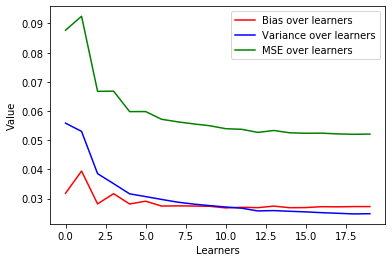

In [0]:
#OBTAIN THE average of each prediction as flatten the tensor in the axis 2 to convert it into a Matrix of 20x569
avg_f = np.mean(all_f_pred,axis=2)

# Obtain the bias^2 of each data
Bias2_bg = np.mean((Y - avg_f)**2, axis=1)

# As all_f_pred is a tensor of T, X.shape, niter dimension, you repeat avg_F niter times to have the same dimension
avg_f_repeat = np.repeat(avg_f[:, :, np.newaxis], niter, axis=2)
#Now you do the difference between the both tensors and then you have to flatten it into a vector. So you do the mean on axis 2 (and u flaten into a 20, 569), and then you do a mean on axis 1 (u flatten it to a 20,1)
Var_bg = np.mean((all_f_pred - avg_f_repeat)**2, axis= (2,1))


# Mse is difference between Y and all_f_pred. As Y is a vector and all_f_pred a tensor, we must repeat Y first to a matrix, then to a tensor.
#Repeating the 0 axis T times we got a Y 20x569
Y_matrix = np.repeat(Y[np.newaxis, :], T, axis=0)
#Now we repeat niter times to got a tensor 20x569x100
Y_tensor = np.repeat(Y_matrix[:, :, np.newaxis], niter, axis=2)
#Now you do the difference between the both tensors and then you have to flatten it into a vector. So you do the mean on axis 2 (and u flaten into a 20, 569), and then you do a mean on axis 1 (u flatten it to a 20,1)
MSE_bg = np.mean((Y_tensor - all_f_pred)**2, axis=(2,1))

plt.figure()
plt.xlabel("Learners")
plt.ylabel("Value")
plt.plot(range(20),Bias2_bg, 'r', label="Bias over learners")
plt.plot(range(20),Var_bg, 'b', label="Variance over learners")
plt.plot(range(20),MSE_bg, 'g', label="MSE over learners")

plt.legend()
plt.show()
 # </SOL>

# **Once you have calculated the bias, variance and MSE we can extract some information. With less lerners our model presents High bias and High variance, so it seems to be underfit and we are using a so simple model to our dataset. Then, if we increase the number of learners variance and bias start to decrease going to 0 (the ideal solution). Our variance is the value that turns to 0 mor rapidly, showing us that the first model (with 1 trainer) wasn't explained correctly our data. By the other hand, the bias also decreases but in remains estable meanwhile we increse our trainers so we have correctly expressed our data. **


<font color='red'>So, the bagging tends to reduce the variance of the error!!!</font> 

In [0]:
 # <SOL>
T = 20
niter= 100
Y[Y==-1] = 0
all_f_pred = np.zeros((T, N, niter))
Bias2_bg = np.zeros([T,N])
Var_bg = np.zeros([T,N])
MSE_bg = np.zeros([T,N])

for n in range(niter):
  samplesid = np.random.choice(N, Nsub, replace=False)
  X_train_sub  = X[samplesid,:]
  Y_train_sub  = Y[samplesid]

  Y_pred_train, Y_pred_test, acc_tree_train, acc_tree_test,  alpha, Dt_all = RAEnsemble(X_train_sub, Y_train_sub, X, Y, T)
  all_f_pred[:, :, n] = Y_pred_test
 # </SOL>

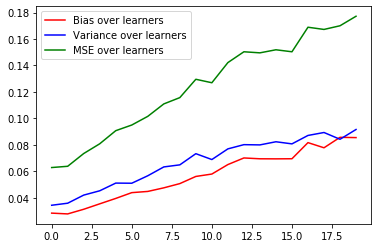

In [0]:
 # <SOL>
avg_f = np.mean(all_f_pred,axis=2)


# Obtain the bias^2 of each data
Bias2_bg = np.mean((Y - avg_f)**2, axis=1)

# As all_f_pred is a tensor of T, X.shape, niter dimension, you repeat avg_F niter times to have the same dimension
avg_f_repeat = np.repeat(avg_f[:, :, np.newaxis], niter, axis=2)
#Now you do the difference between the both tensors and then you have to flatten it into a vector. So you do the mean on axis 2 (and u flaten into a 20, 569), and then you do a mean on axis 1 (u flatten it to a 20,1)
Var_bg = np.mean((all_f_pred - avg_f_repeat)**2, axis= (2,1))


# Mse is difference between Y and all_f_pred. As Y is a vector and all_f_pred a tensor, we must repeat Y first to a matrix, then to a tensor.
#Repeating the 0 axis T times we got a Y 20x569
Y_matrix = np.repeat(Y[np.newaxis, :], T, axis=0)
#Now we repeat niter times to got a tensor 20x569x100
Y_tensor = np.repeat(Y_matrix[:, :, np.newaxis], niter, axis=2)
#Now you do the difference between the both tensors and then you have to flatten it into a vector. So you do the mean on axis 2 (and u flaten into a 20, 569), and then you do a mean on axis 1 (u flatten it to a 20,1)
MSE_bg = np.mean((Y_tensor - all_f_pred)**2, axis=(2,1))

plt.figure()
plt.plot(Bias2_bg, 'r', label="Bias over learners")
plt.plot(Var_bg, 'b', label="Variance over learners")
plt.plot(MSE_bg, 'g', label="MSE over learners")

plt.legend()
plt.show()
 # </SOL>
 # </SOL>

# **These results are not correct. We have implemented the same algorithm that we used before on the Bagging method but the results are not consistent. Our bias should decrease meanwhile we add more learners and the variance should increse. That is because Boosting method tend to overfit normally if you add so much learners. That is because if we emphasies on wrong classification to retrain our model we are not generalizying. In fact, we can be creating the model so complex to fit all our train data which was missclassified, so it tends to overfit. Explained that, the result should be a Bias decreasing (because we make our model more complex) and the variance increasing meanwhile we increase the number of learners. MSE, as it depends on variance a Bias should increase with variance.*

<font color='red'>This is happening beacuse your RA output are soft output (not -1 and 1). But I almost agree with your conclusions.</font> 